By: Michał Marusiński, Jan Łucarz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Starting of by importing preprocessed data

In [2]:
data = pd.read_csv(r"D:\Studia\Workshop\Models\valid_patients_data.csv")

In [3]:
print(data.shape)
data.head()

(18620, 14)


,trials.thisTrialN,trials.thisN,trials.thisIndex,text_4.started,image.started,mouse.started,Valence.started,Valence_rating.response,Valence_rating.rt,Valence_rating.started,Arousal.started,Arousal_rating.response,Arousal_rating.rt,Arousal_rating.started
0,0.0,0.0,173.0,87.767878,87.767878,0.001703,90.190618,3.0,14.737,0.005782,90.190618,6.0,10.296,0.005782
1,1.0,1.0,149.0,104.943973,104.943973,0.003452,107.046095,7.0,27.327,0.013047,107.046095,3.0,30.303,0.013047
2,2.0,2.0,5.0,137.397414,137.397414,0.007579,140.316976,3.0,9.902,0.012221,140.316976,5.0,5.624,0.012221
3,3.0,3.0,212.0,150.274517,150.274517,0.001352,151.598203,7.0,12.557,0.014221,151.598203,3.0,5.729,0.014221
4,4.0,4.0,9.0,164.203495,164.203495,0.010700,166.333420,5.0,9.221,0.013314,166.333420,4.0,2.346,0.013314


Splitting valence, arousal ratings into high (6-9) and low (1-5)

In [4]:
def valence_apply(row):
        return 'low valence' if row in list(range(1,6,1)) else 'high valence'
def arousal_apply(row):
        return 'low arousal' if row in list(range(1,6,1)) else 'high arousal'

In [5]:
data['Valence behaviour'] = data['Valence_rating.response'].apply(valence_apply)
data['Arousal behaviour'] = data['Arousal_rating.response'].apply(arousal_apply)

Creating machine learning models - starting of with data selection and changes: string (high / low) --> binary(1 / 0) and deleting response rating columns

In [6]:
data['Valence behaviour'] = np.where( data['Valence behaviour'] == 'high valence', 1, 0)
data['Arousal behaviour'] = np.where( data['Arousal behaviour'] == 'high arousal', 1, 0)

#deleting response ratings columns
data.drop(['Valence_rating.response', 'Arousal_rating.response'], inplace = True, axis = 1)
#useless column
data.drop('trials.thisIndex', inplace = True, axis = 1)

In [7]:
data.columns

Index(['trials.thisTrialN', 'trials.thisN', 'text_4.started', 'image.started',
       'mouse.started', 'Valence.started', 'Valence_rating.rt',
       'Valence_rating.started', 'Arousal.started', 'Arousal_rating.rt',
       'Arousal_rating.started', 'Valence behaviour', 'Arousal behaviour'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

Choose a target data to be predicted

In [9]:
target = 'Valence behaviour'
target_name = target.split(' ')[0]

Basic split of the data - we choose here split 80 / 20

In [10]:
X = data.drop(columns = ['Valence behaviour', 'Arousal behaviour'])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In case of kNN and SVM use, we need to rescale the values to make it adjustable for algorithms.
For others, it's optional as their efficiency may improve. 

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Implementation of classifiers with non-specific hyperparameters

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
lgbm = LGBMClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC()


models = {rf : 'random_forest', dt : "decision_tree", xgb : "xgboost", lgbm : "lightgbm", knn : "knn", svm : "svm"}

In a loop, Fitting each of them to training values

Accuracy: 0.5955961331901182
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.84      0.72      2293
           1       0.44      0.21      0.28      1431

    accuracy                           0.60      3724
   macro avg       0.54      0.52      0.50      3724
weighted avg       0.56      0.60      0.55      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\classification_report_Valence_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\confusion_matrix_Valence_standarized.png


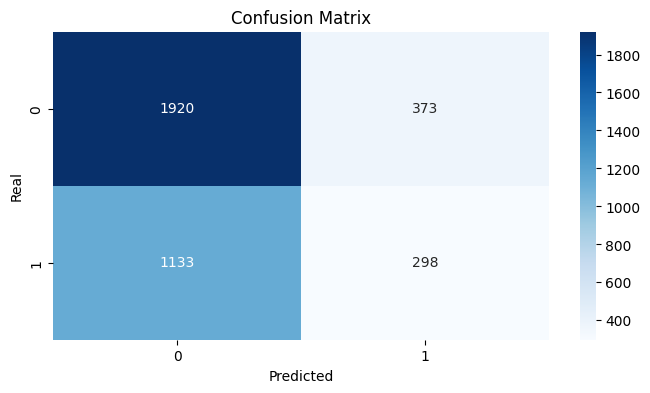

Accuracy: 0.5413533834586466
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      2293
           1       0.41      0.42      0.41      1431

    accuracy                           0.54      3724
   macro avg       0.52      0.52      0.52      3724
weighted avg       0.54      0.54      0.54      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\classification_report_Valence_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\confusion_matrix_Valence_standarized.png


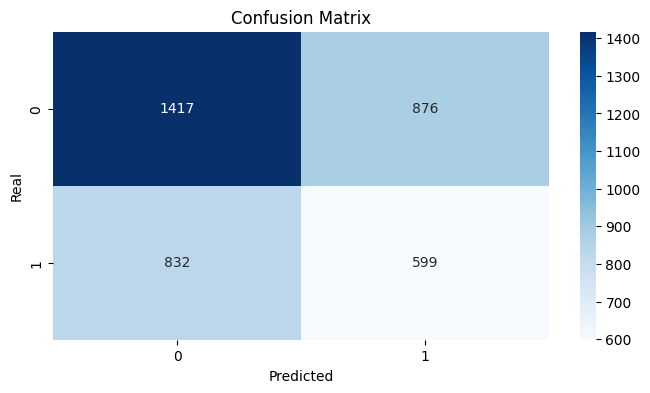

Accuracy: 0.5856605800214822
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.81      0.71      2293
           1       0.43      0.23      0.30      1431

    accuracy                           0.59      3724
   macro avg       0.53      0.52      0.50      3724
weighted avg       0.55      0.59      0.55      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\xgboost\classification_report_Valence_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\xgboost\confusion_matrix_Valence_standarized.png


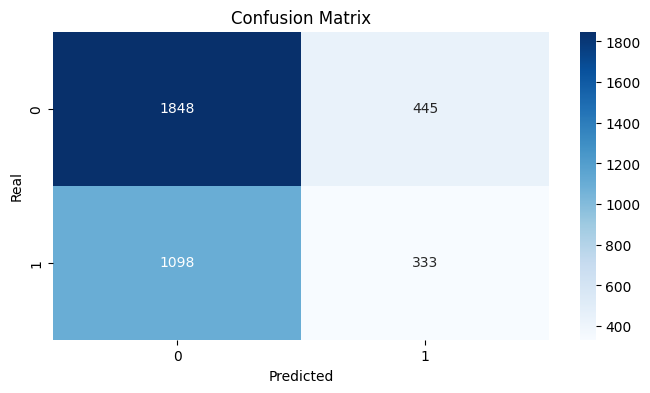

[LightGBM] [Info] Number of positive: 5659, number of negative: 9237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2777
[LightGBM] [Info] Number of data points in the train set: 14896, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379901 -> initscore=-0.489970
[LightGBM] [Info] Start training from score -0.489970
Accuracy: 0.6079484425349087
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.93      0.75      2293
           1       0.45      0.09      0.15      1431

    accuracy                           0.61      3724
   macro avg       0.53      0.51      0.45      3724
weighted avg       0.55      0.61      0.51      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\lightgbm\classification_

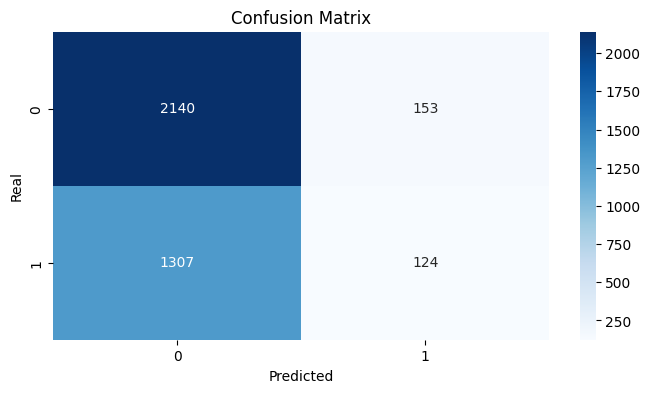

Accuracy: 0.5663265306122449
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      2293
           1       0.42      0.33      0.37      1431

    accuracy                           0.57      3724
   macro avg       0.52      0.52      0.52      3724
weighted avg       0.55      0.57      0.55      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\knn\classification_report_Valence_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\knn\confusion_matrix_Valence_standarized.png


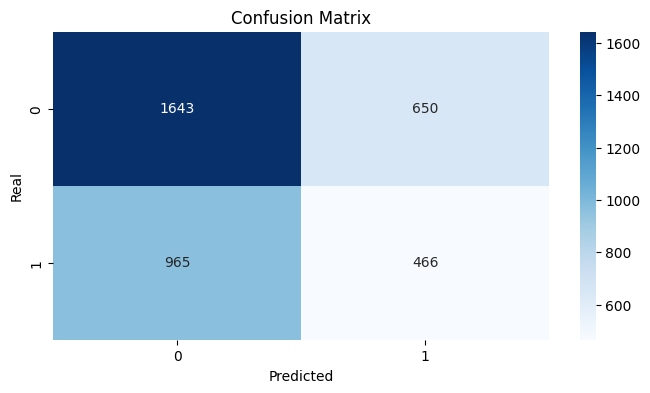

Accuracy: 0.6162728249194415
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      2293
           1       0.67      0.00      0.01      1431

    accuracy                           0.62      3724
   macro avg       0.64      0.50      0.38      3724
weighted avg       0.64      0.62      0.47      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\svm\classification_report_Valence_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\svm\confusion_matrix_Valence_standarized.png


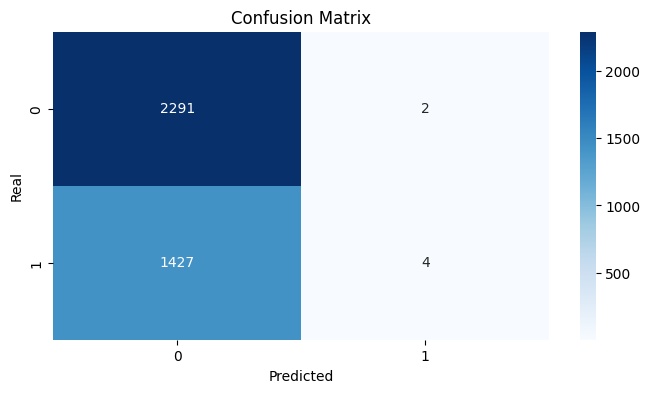

In [13]:
import model_eval

for model, model_name in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_eval.evaluation(y_test = y_test, y_pred = y_pred, name_of_classifier=model_name, feature_predicted = target_name, standarized = True)


Implementation of same models but with tuners included ( 10 - K Validation with Tuner)

In [14]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()
knn = KNeighborsClassifier()
svm = SVC()

models = {rf : 'random_forest', dt : "decision_tree", xgb : "xgboost", lgbm : "lightgbm", knn : "knn", svm : "svm"}


We import all the param_grids necessary for GridSearch Tuner from module file - param_grids

In [15]:
from param_grids import param_grids

RandomForestClassifier()
Accuracy: 0.6060687432867884
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.96      0.75      2293
           1       0.39      0.04      0.08      1431

    accuracy                           0.61      3724
   macro avg       0.50      0.50      0.41      3724
weighted avg       0.53      0.61      0.49      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\classification_report_Valence_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\confusion_matrix_Valence_standarized_cross_validation.png


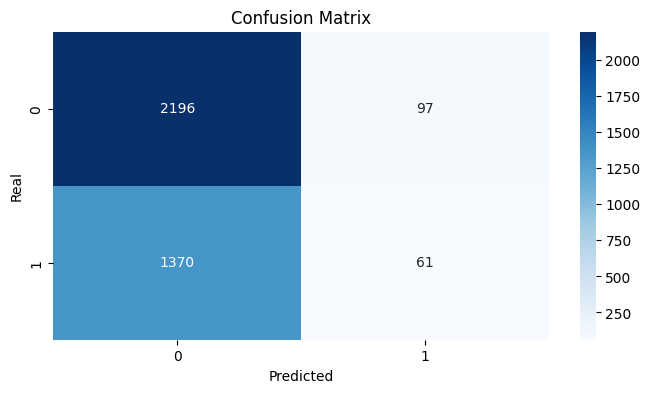

DecisionTreeClassifier()
Accuracy: 0.5888829215896885
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.91      0.73      2293
           1       0.35      0.08      0.13      1431

    accuracy                           0.59      3724
   macro avg       0.48      0.49      0.43      3724
weighted avg       0.51      0.59      0.50      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\classification_report_Valence_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\confusion_matrix_Valence_standarized_cross_validation.png


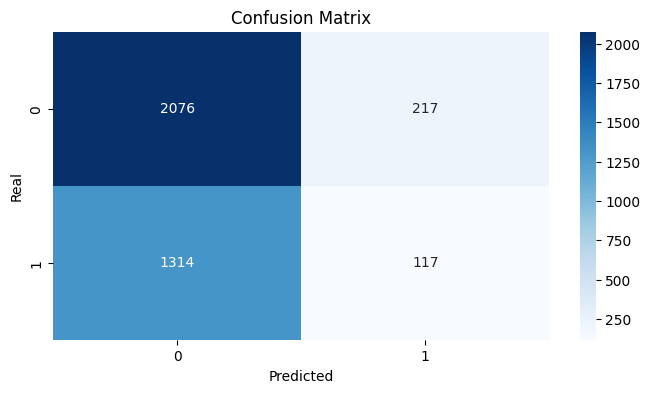

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 0.6133190118152524
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.99      0.76      2293
           1       0.35      0.01      0.02      1431

    accuracy              

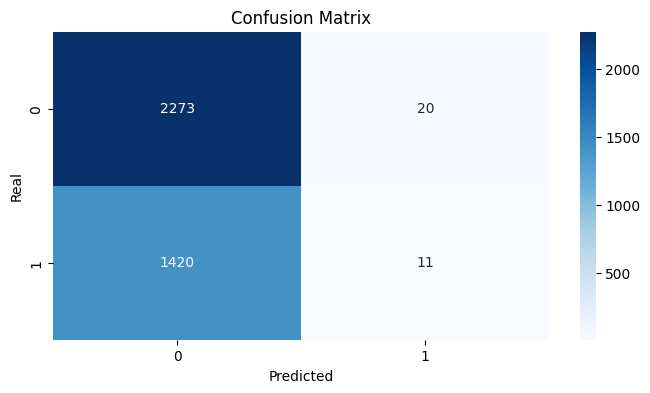

LGBMClassifier()
[LightGBM] [Info] Number of positive: 5093, number of negative: 8313
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2777
[LightGBM] [Info] Number of data points in the train set: 13406, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379905 -> initscore=-0.489954
[LightGBM] [Info] Start training from score -0.489954
[LightGBM] [Info] Number of positive: 5093, number of negative: 8313
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2777
[LightGBM] [Info] Number of data points in the train set: 13406, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379905 -> initscore=-0.489954
[LightGBM] [Info] Start training from score -0.489954

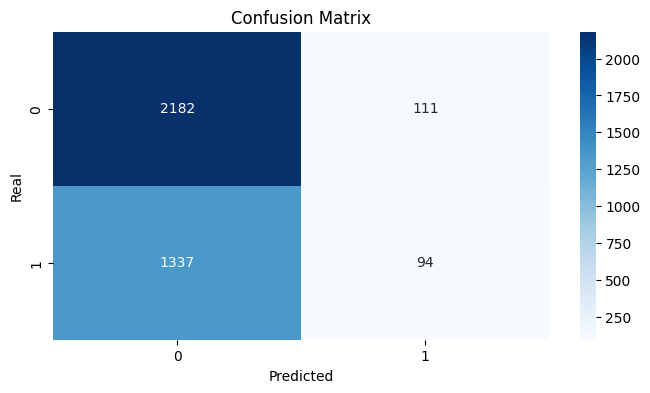

KNeighborsClassifier()
Accuracy: 0.5945220193340494
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.83      0.72      2293
           1       0.44      0.21      0.29      1431

    accuracy                           0.59      3724
   macro avg       0.54      0.52      0.50      3724
weighted avg       0.56      0.59      0.55      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\knn\classification_report_Valence_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\knn\confusion_matrix_Valence_standarized_cross_validation.png


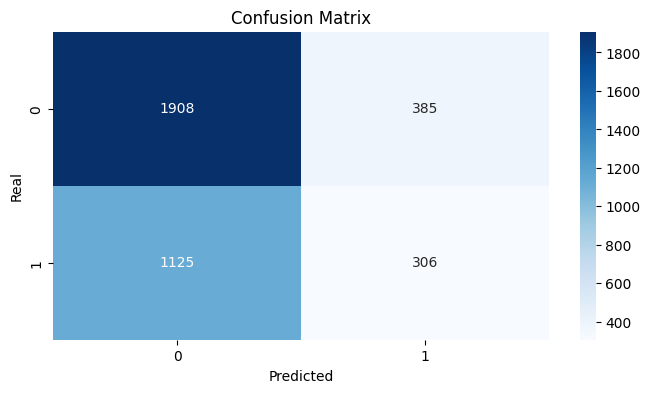

SVC()
Accuracy: 0.6157357679914071
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76      2293
           1       0.00      0.00      0.00      1431

    accuracy                           0.62      3724
   macro avg       0.31      0.50      0.38      3724
weighted avg       0.38      0.62      0.47      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\svm\classification_report_Valence_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\svm\confusion_matrix_Valence_standarized_cross_validation.png


c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

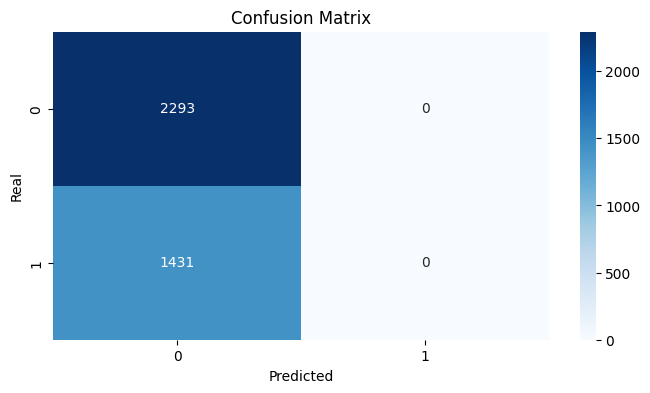

In [16]:
for model, model_name in models.items():
    print(model)
    grid_search = GridSearchCV(param_grid = param_grids[model_name], estimator = model, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred_cv = cross_val_predict(best_clf, X_test, y_test, cv=10)
    model_eval.evaluation(y_test = y_test, y_pred = y_pred_cv,
                          name_of_classifier=model_name,
                          feature_predicted = target_name,
                          cross_validation = True,
                          standarized = True)

We change our target from Valence behaviour to Arousal

In [17]:
target = 'Arousal behaviour'
target_name = target.split(" ")[0]

X = data.drop(columns = ['Valence behaviour', 'Arousal behaviour'])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
lgbm = LGBMClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC()


models = {rf : 'random_forest', dt : "decision_tree", xgb : "xgboost", lgbm : "lightgbm", knn : "knn", svm : "svm"}

Accuracy: 0.7682599355531686
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      2888
           1       0.38      0.05      0.09       836

    accuracy                           0.77      3724
   macro avg       0.58      0.51      0.48      3724
weighted avg       0.69      0.77      0.69      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\classification_report_Arousal_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\confusion_matrix_Arousal_standarized.png


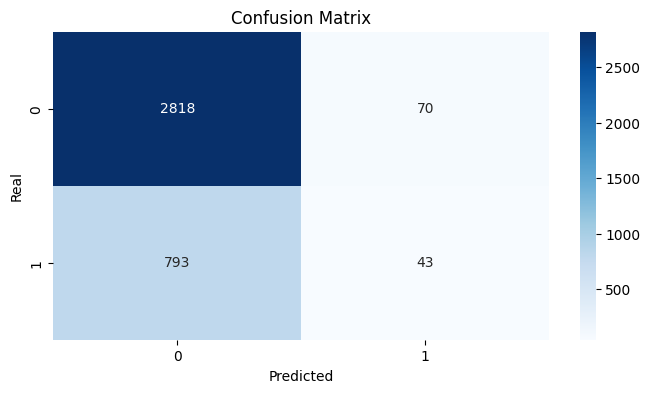

Accuracy: 0.6659505907626209
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2888
           1       0.27      0.29      0.28       836

    accuracy                           0.67      3724
   macro avg       0.53      0.53      0.53      3724
weighted avg       0.67      0.67      0.67      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\classification_report_Arousal_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\confusion_matrix_Arousal_standarized.png


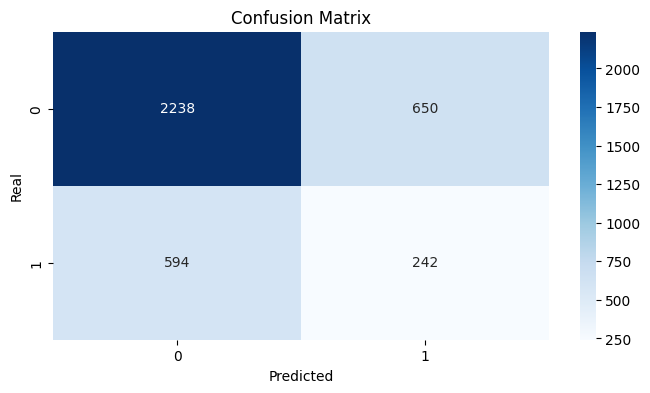

Accuracy: 0.7634264232008593
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      2888
           1       0.38      0.09      0.14       836

    accuracy                           0.76      3724
   macro avg       0.58      0.52      0.50      3724
weighted avg       0.69      0.76      0.70      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\xgboost\classification_report_Arousal_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\xgboost\confusion_matrix_Arousal_standarized.png


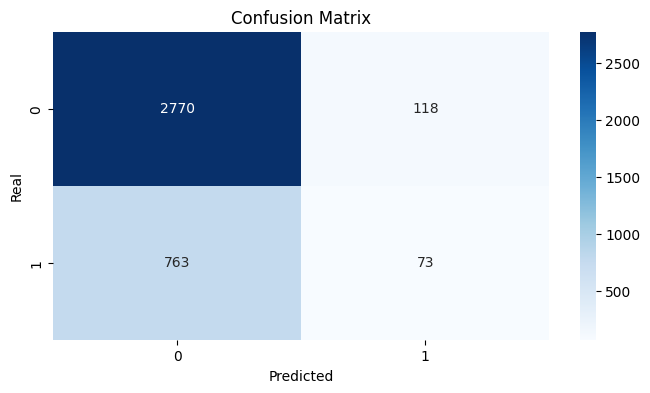

[LightGBM] [Info] Number of positive: 3391, number of negative: 11505
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2777
[LightGBM] [Info] Number of data points in the train set: 14896, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227645 -> initscore=-1.221657
[LightGBM] [Info] Start training from score -1.221657
Accuracy: 0.7747046186895811
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2888
           1       0.46      0.02      0.04       836

    accuracy                           0.77      3724
   macro avg       0.62      0.51      0.46      3724
weighted avg       0.71      0.77      0.69      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\lightgbm\classification

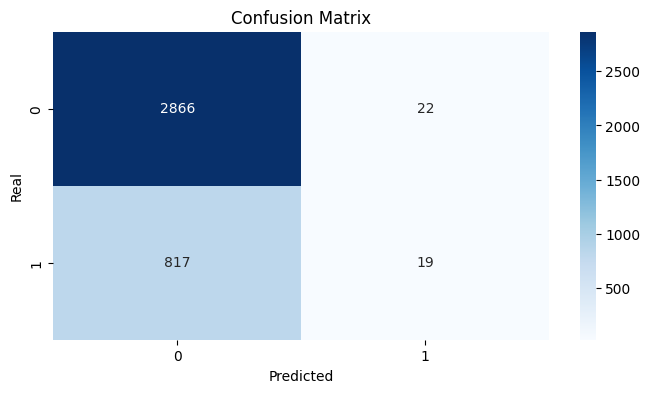

Accuracy: 0.7432867883995704
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2888
           1       0.35      0.17      0.23       836

    accuracy                           0.74      3724
   macro avg       0.57      0.54      0.54      3724
weighted avg       0.69      0.74      0.71      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\knn\classification_report_Arousal_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\knn\confusion_matrix_Arousal_standarized.png


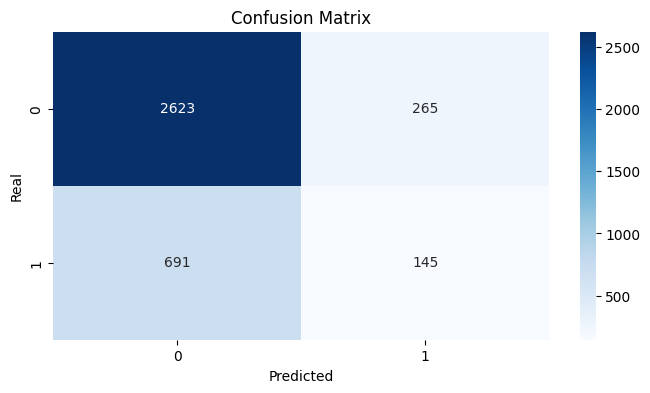

Accuracy: 0.7755102040816326
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2888
           1       0.00      0.00      0.00       836

    accuracy                           0.78      3724
   macro avg       0.39      0.50      0.44      3724
weighted avg       0.60      0.78      0.68      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\svm\classification_report_Arousal_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\svm\confusion_matrix_Arousal_standarized.png


c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

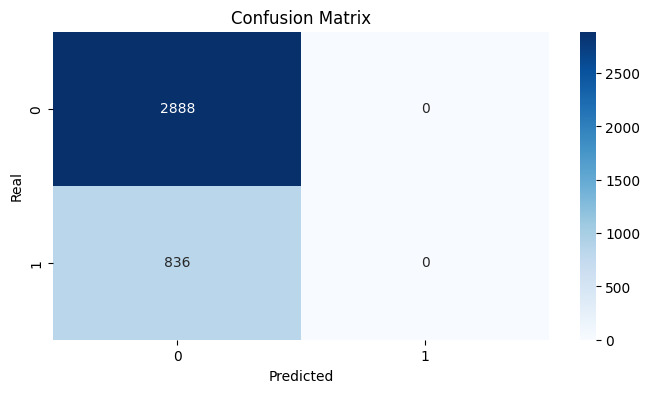

In [20]:
import model_eval

for model, model_name in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_eval.evaluation(y_test = y_test, y_pred = y_pred,
                          name_of_classifier=model_name,
                          feature_predicted = target_name,
                          standarized = True)


In [21]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()
knn = KNeighborsClassifier()
svm = SVC()

models = {rf : 'random_forest', dt : "decision_tree", xgb : "xgboost", lgbm : "lightgbm", knn : "knn", svm : "svm"}


RandomForestClassifier()
Accuracy: 0.7752416756176155
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2888
           1       0.00      0.00      0.00       836

    accuracy                           0.78      3724
   macro avg       0.39      0.50      0.44      3724
weighted avg       0.60      0.78      0.68      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\classification_report_Arousal_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\random_forest\confusion_matrix_Arousal_standarized_cross_validation.png


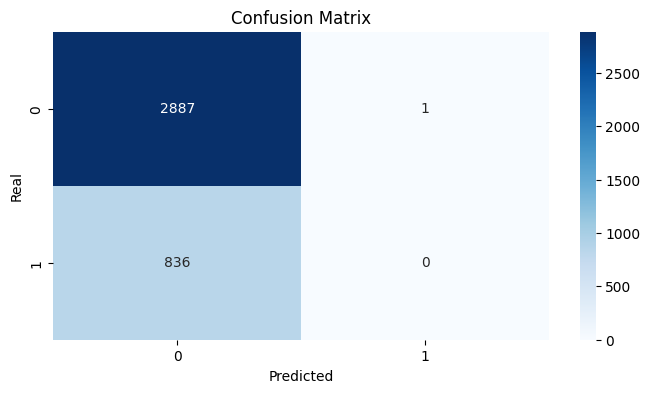

DecisionTreeClassifier()
Accuracy: 0.7247583243823845
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.84      2888
           1       0.21      0.08      0.11       836

    accuracy                           0.72      3724
   macro avg       0.49      0.50      0.48      3724
weighted avg       0.65      0.72      0.67      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\classification_report_Arousal_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\decision_tree\confusion_matrix_Arousal_standarized_cross_validation.png


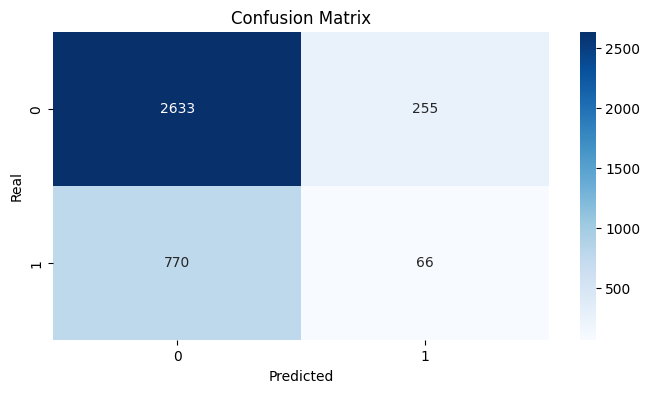

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 0.7744360902255639
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2888
           1       0.40      0.01      0.02       836

    accuracy              

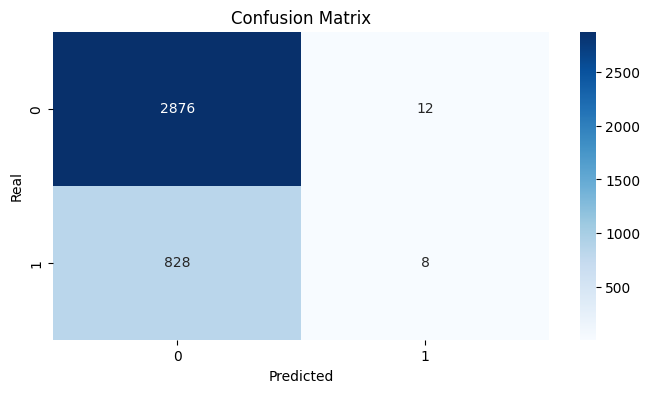

LGBMClassifier()
[LightGBM] [Info] Number of positive: 3051, number of negative: 10355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2777
[LightGBM] [Info] Number of data points in the train set: 13406, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227585 -> initscore=-1.222000
[LightGBM] [Info] Start training from score -1.222000
[LightGBM] [Info] Number of positive: 3052, number of negative: 10354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2777
[LightGBM] [Info] Number of data points in the train set: 13406, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227659 -> initscore=-1.221576
[LightGBM] [Info] Start training from score -1.2215

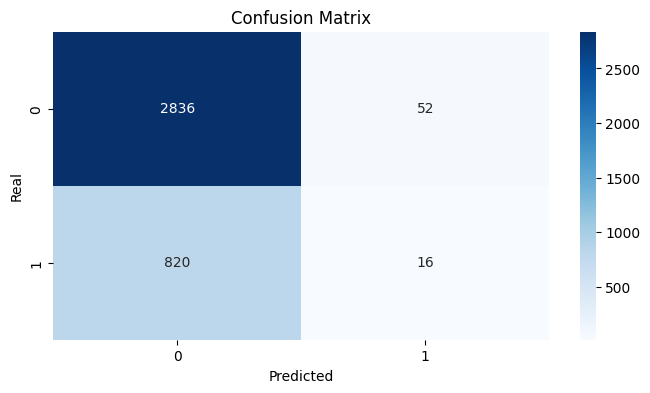

KNeighborsClassifier()
Accuracy: 0.7655746509129968
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      2888
           1       0.31      0.04      0.07       836

    accuracy                           0.77      3724
   macro avg       0.55      0.51      0.47      3724
weighted avg       0.67      0.77      0.69      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\knn\classification_report_Arousal_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\knn\confusion_matrix_Arousal_standarized_cross_validation.png


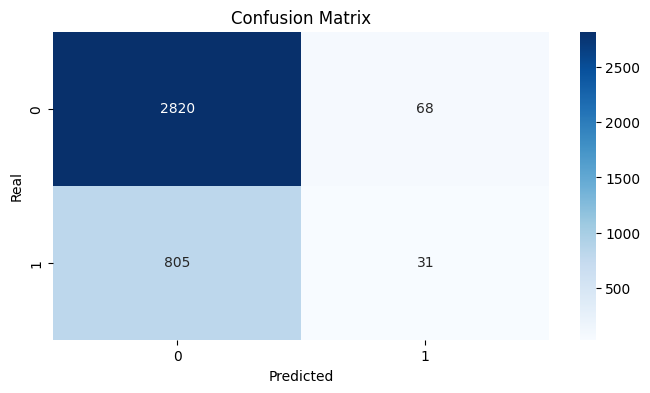

SVC()
Accuracy: 0.7755102040816326
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2888
           1       0.00      0.00      0.00       836

    accuracy                           0.78      3724
   macro avg       0.39      0.50      0.44      3724
weighted avg       0.60      0.78      0.68      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\svm\classification_report_Arousal_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 5 - 9\svm\confusion_matrix_Arousal_standarized_cross_validation.png


c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

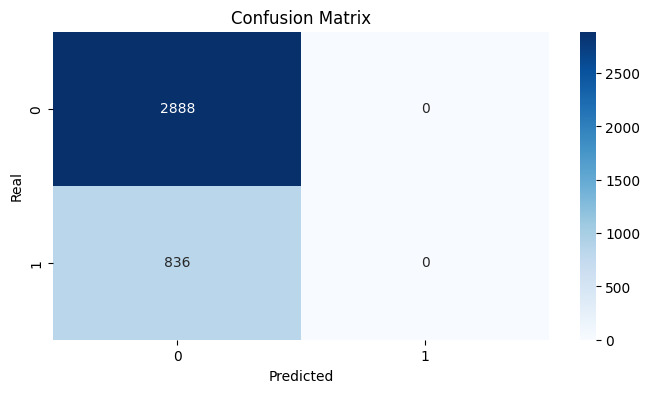

In [22]:
for model, model_name in models.items():
    print(model)
    grid_search = GridSearchCV(param_grid = param_grids[model_name], estimator = model, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred_cv = cross_val_predict(best_clf, X_test, y_test, cv=10)
    model_eval.evaluation(y_test = y_test, y_pred = y_pred_cv,
                          name_of_classifier=model_name,
                          feature_predicted = target_name,
                          cross_validation = True,
                          standarized = True)